In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('insurance.csv') # Medical Insurance Cost Regression
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df['charges'] = np.log(df['charges'])
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('charges', axis=1).values
Y = df_encoded['charges'].values

In [30]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,False,True,False,False,True
1,18,33.770,1,7.453302,True,False,False,True,False
2,28,33.000,3,8.400538,True,False,False,True,False
3,33,22.705,0,9.998092,True,False,True,False,False
4,32,28.880,0,8.260197,True,False,True,False,False


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [32]:
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 1070
Test samples: 268


In [33]:
sc_X = StandardScaler() # Create scaler object
X_train = sc_X.fit_transform(X_train) # Fit to training data and transform
X_test  = sc_X.transform(X_test) # Transform test data using same scaler
print("Train mean (first 5):", X_train.mean(axis=0)[:5])
print("Train std  (first 5):", X_train.std(axis=0, ddof=0)[:5])

Train mean (first 5): [-1.07961407e-16  4.84202502e-15 -5.11532665e-17 -3.61081881e-17
 -8.84028053e-17]
Train std  (first 5): [1. 1. 1. 1. 1.]


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

model = SVR(kernel='rbf')  # Try 'linear', 'poly', or 'rbf'
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))

Mean Squared Error: 0.10733870311547361
R² Score: 0.8721806683626009


In [47]:
Y_pred[:20]

array([ 9.28647003,  9.12301956, 10.80843384,  9.50697965,  9.23895089,
        8.36000763,  7.79292523,  9.40140893,  8.97331393,  8.71976127,
        8.93043741,  9.34541724,  8.97585678,  8.32411881,  9.9534822 ,
        9.38904314,  9.51763753,  8.22223916,  8.86195575, 10.16861904])

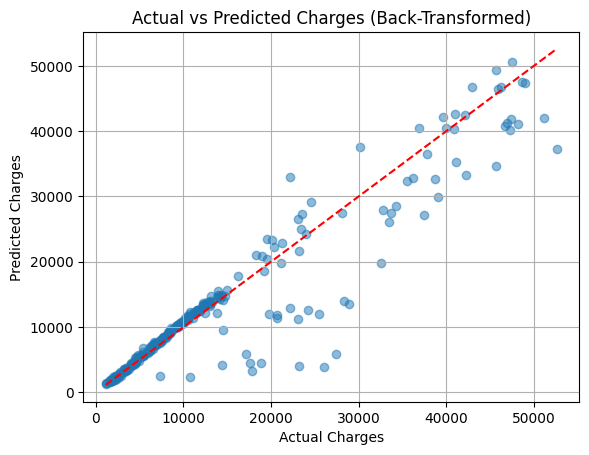

In [48]:
Y_pred_actual = np.exp(Y_pred)
Y_test_actual = np.exp(Y_test)
plt.scatter(Y_test_actual, Y_pred_actual, alpha=0.5)
plt.plot([Y_test_actual.min(), Y_test_actual.max()],
         [Y_test_actual.min(), Y_test_actual.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Back-Transformed)')
plt.grid(True)
plt.show()